In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,UpSampling2D,InputLayer,Reshape,Activation, BatchNormalization, LeakyReLU
from keras.models import Sequential
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras import activations
from keras import optimizers
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
x_data = []
y_data = []

def loadmydata():
    for item in os.listdir('/content/drive/MyDrive/Explomy/Final_data/x_train'):

        os.chdir('/content/drive/MyDrive/Explomy/Final_data/x_train')
        img = load_img(item)
        #img = img.resize((540,258)) 
        arr = img_to_array(img)
        x_data.append(arr)

        os.chdir('/content/drive/MyDrive/Explomy/Final_data/y_train')
        img = load_img(item)
        #img = img.resize((540,258))
        arr = img_to_array(img)
        y_data.append(arr)  

loadmydata()

x_data = tf.image.rgb_to_grayscale(x_data)
y_data = tf.image.rgb_to_grayscale(y_data)


In [ ]:
print(x_data[0].shape, y_data[0].shape)
x_data.shape

(258, 540, 1) (258, 540, 1)


TensorShape([480, 258, 540, 1])

In [ ]:
def preprocess(arr):
    arr=np.asarray(arr,dtype="float32")
    arr2=arr/255
    return arr2
        

x_train = preprocess(x_data)
y_train = preprocess(y_data)

In [ ]:
opt = optimizers.RMSprop(learning_rate=0.001)
model = Sequential()

model.add(Conv2D(128, (3, 3), padding='same',input_shape=(258,540,1),data_format="channels_last"))
model.add(BatchNormalization())
model.add(Activation(activations.relu))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same')) 

model.add(Conv2D(64, (3, 3), padding='same', ))
model.add(BatchNormalization())
model.add(Activation(activations.relu))

model.add(Conv2D(64, (3, 3), padding='same',activation='relu' ))
model.add(UpSampling2D((2, 2))) 

model.add(Conv2D(1, (3, 3), activation=tf.keras.backend.sigmoid, padding='same'))
model.compile(loss="mean_squared_error",optimizer=opt, metrics = [tf.keras.metrics.RootMeanSquaredError()])
print(model.summary())

    
model.fit(x_train,
          y_train,
          epochs = 100,
          batch_size = 7,
          validation_split=0.1,          
          verbose=1)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 258, 540, 128)     1280      
_________________________________________________________________
batch_normalization_2 (Batch (None, 258, 540, 128)     512       
_________________________________________________________________
activation_2 (Activation)    (None, 258, 540, 128)     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 258, 540, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 129, 270, 128)     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 129, 270, 64)      73792     
_________________________________________________________________
batch_normalization_3 (Batch (None, 129, 270, 64)     

In [ ]:
x_data_test = []
y_data_test = []

def loadmydatatest():
    for item in os.listdir('/content/drive/MyDrive/Explomy/Final_data/x_test'):

        os.chdir('/content/drive/MyDrive/Explomy/Final_data/x_test')
        img = load_img(item)
        #img = img.resize((540,258)) 
        arr = img_to_array(img)
        x_data_test.append(arr)

        os.chdir('/content/drive/MyDrive/Explomy/Final_data/y_test')
        img = load_img(item)
        #img = img.resize((540,258))
        arr = img_to_array(img)
        y_data_test.append(arr)  

loadmydatatest()

x_data_test = tf.image.rgb_to_grayscale(x_data_test)
y_data_test = tf.image.rgb_to_grayscale(y_data_test)

In [ ]:
print(x_data_test[0].shape, y_data_test[0].shape)
x_data_test.shape

(258, 540, 1) (258, 540, 1)


TensorShape([24, 258, 540, 1])

In [ ]:
x_test = preprocess(x_data_test)
y_test = preprocess(y_data_test)

In [ ]:
from sklearn.metrics import mean_squared_error
rms=0

y_t = np.squeeze(y_test)

for i in range(len(x_test)):
    check = x_test[i]
    matrix=model.predict(check.reshape((1,)+check.shape)).reshape(258,540,1)
    matrix = np.squeeze(matrix)
    rms += mean_squared_error(y_t[i], matrix, squared=False)

rms/=len(x_test)
rms  

0.023197849824403722

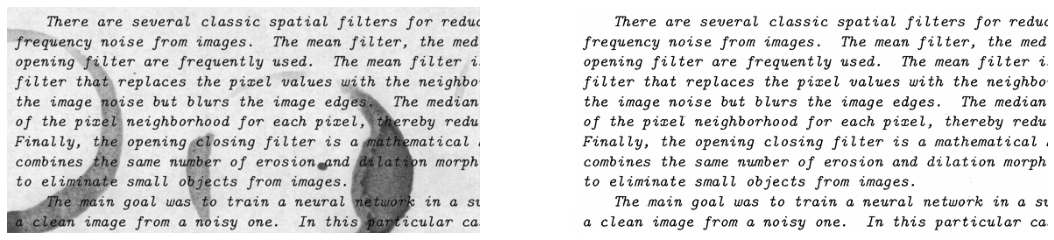

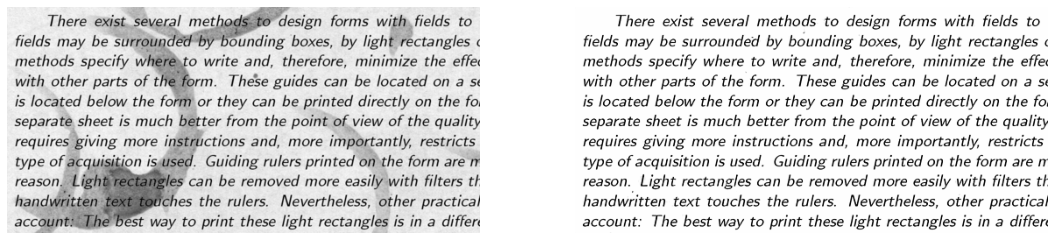

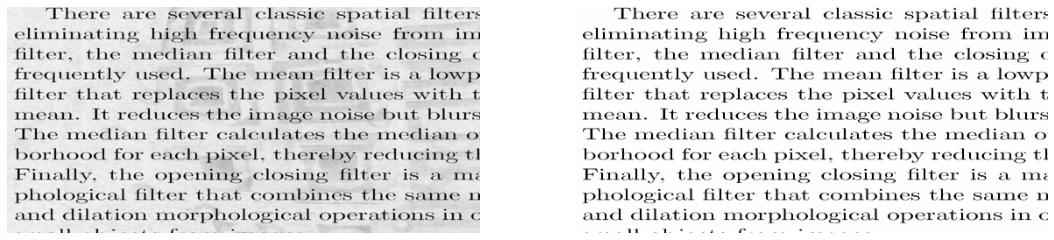

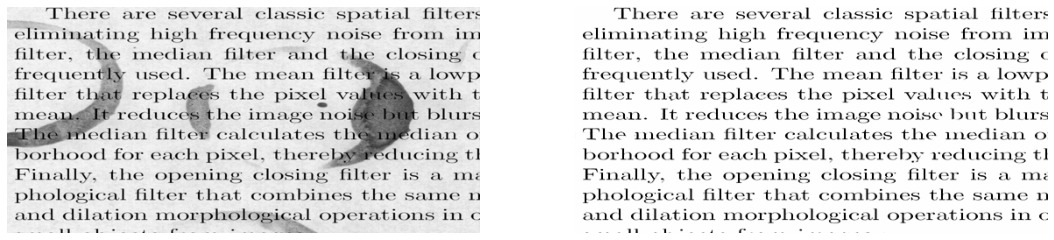

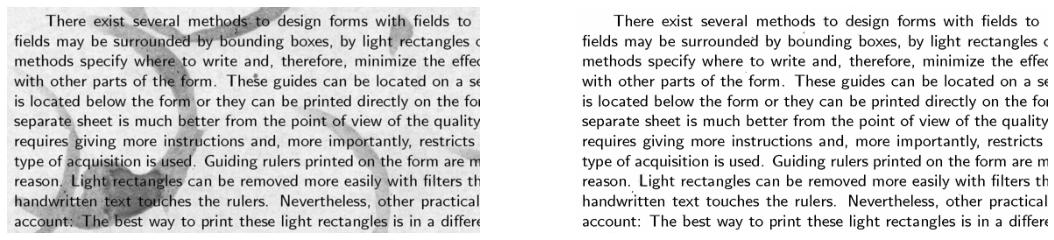

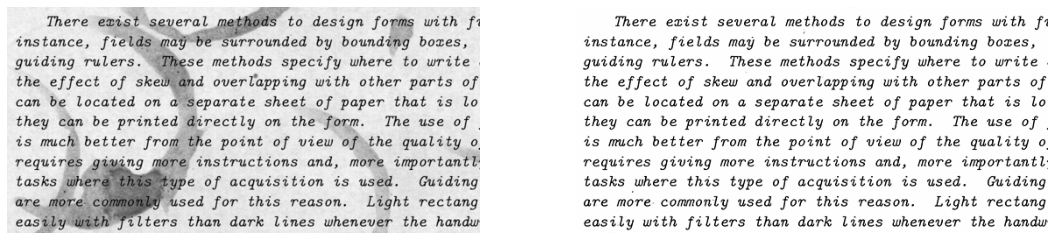

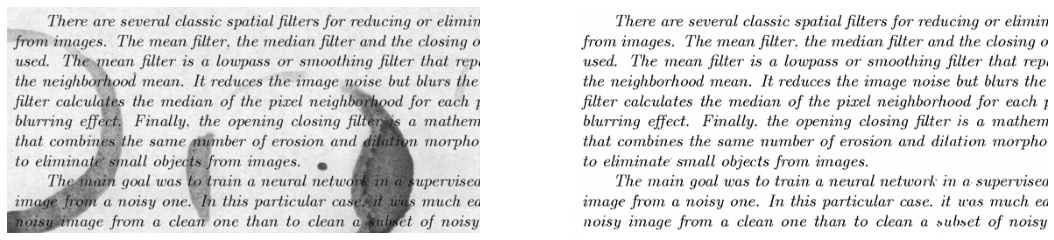

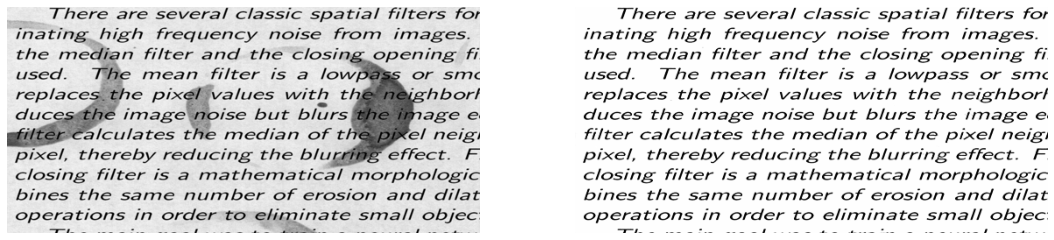

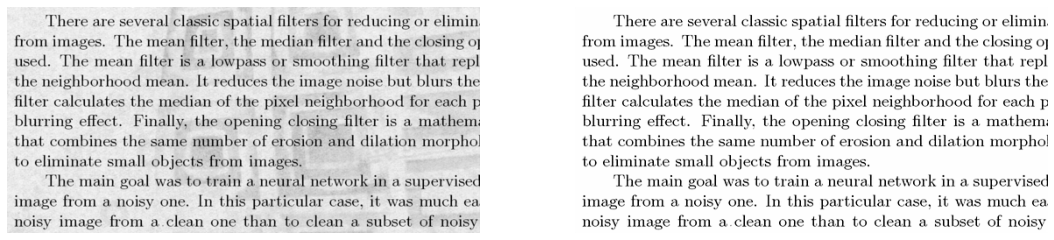

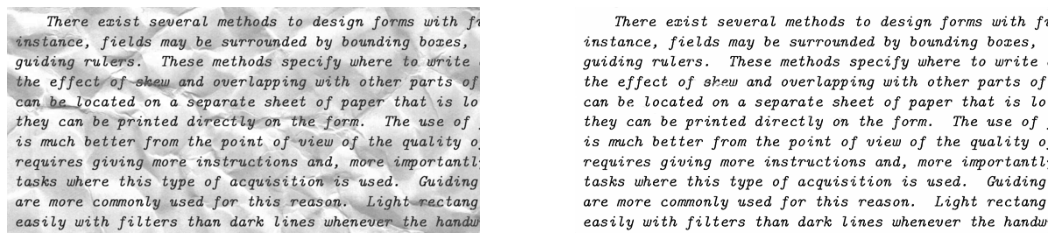

In [ ]:
for i in range(10,20):
    check = x_test[i]
    matrix=model.predict(check.reshape((1,)+check.shape)).reshape(258,540,1)
    
    plt.figure(figsize=(100,100))
    plt.subplot(10,10,1)
    plt.axis("off")
    plt.imshow(array_to_img(check+0.5),cmap="gray")
    plt.subplot(10,10,2)
    plt.axis("off")
    plt.imshow(array_to_img(matrix+0.5),cmap="gray")

In [ ]:
model.save('/content/drive/MyDrive/Explomy/my_model.h5') 